In [1]:
import pandas as pd
import numpy as np

SEED = 5
np.random.seed(SEED)

filmes = pd.read_csv('./data/movies.csv')
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
generos = filmes.generos.str.get_dummies()
filmes = pd.concat([filmes, generos], axis = 1)

filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Escalar
from sklearn.preprocessing import StandardScaler

model = StandardScaler()
generos_escalados = model.fit_transform(generos);

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(generos_escalados)
print(f'Grupos: {model.labels_}')

Grupos: [0 0 1 ... 1 0 1]


In [5]:
grupos = pd.DataFrame(model.cluster_centers_, columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.128784,1.109320,1.940789,2.116845,0.159298,-0.321911,-0.199931,-0.597764,1.204119,-0.094926,-0.276422,0.311823,0.312560,-0.137629,-0.272691,0.141367,-0.470528,-0.169144,-0.089928
1,0.035832,-0.294460,-0.240731,-0.252562,-0.269143,0.205692,-0.190532,0.127716,0.156981,-0.165394,-0.089670,-0.160219,-0.106218,0.019890,-0.186948,0.191862,-0.239651,-0.477933,0.079865,0.044412
2,-0.059180,0.638537,0.094618,-0.231471,-0.267372,-0.552150,0.585674,-0.215621,-0.115179,-0.123130,0.251554,0.494933,0.117369,-0.179889,0.498789,-0.335692,0.504122,1.325677,-0.116053,-0.066295


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

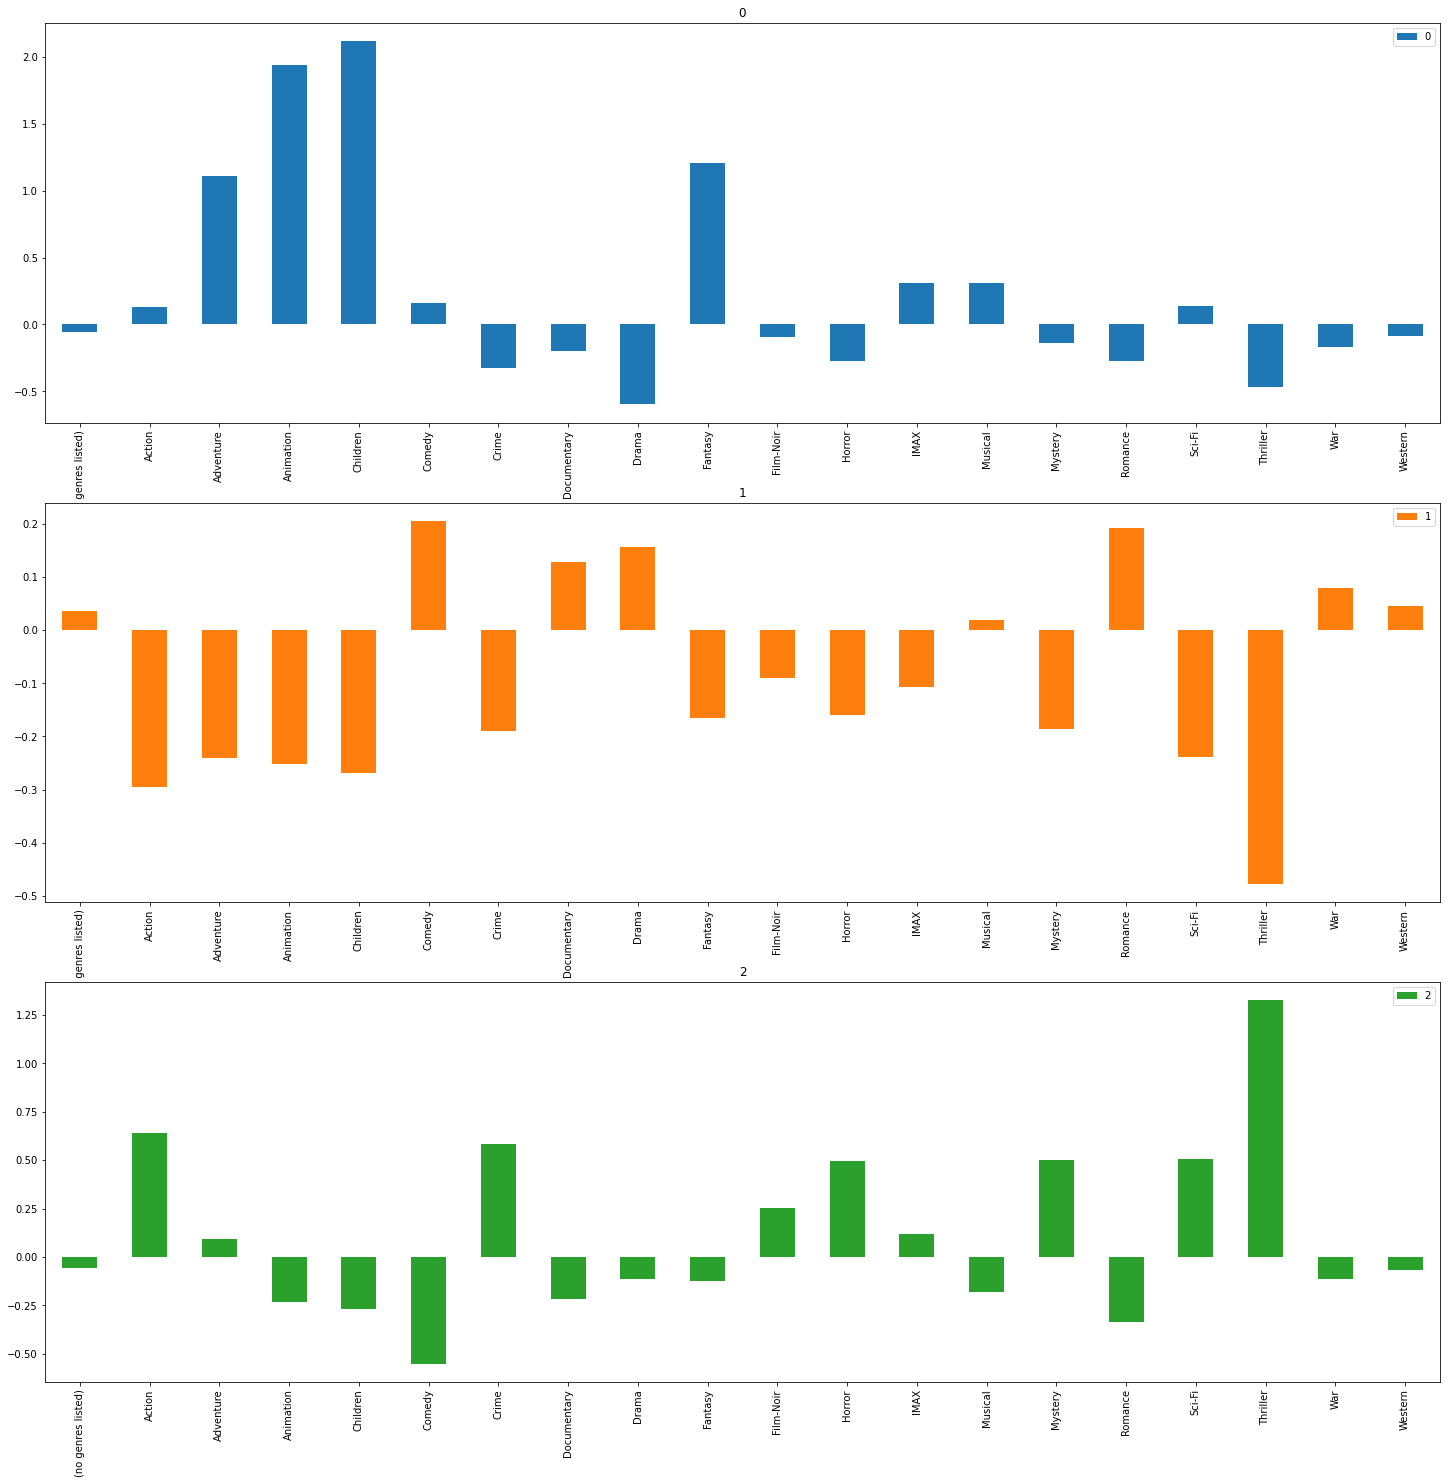

In [6]:
grupos.T.plot.bar(subplots = True, 
                  figsize=(25, 25), 
                  sharex=False)

In [7]:
n_grupo = 0
filtro = model.labels_ == n_grupo

filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7608,86880,Pirates of the Caribbean: On Stranger Tides (2...,Action|Adventure|Fantasy|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7887,94833,"Pirates! Band of Misfits, The (2012)",Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
72,80,"White Balloon, The (Badkonake sefid) (1995)",Children|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8535,115111,Ward 13 (2003),Action|Animation|Comedy|Horror,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3984,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9667,182639,The Second Renaissance Part II (2003),Animation|Sci-Fi,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
464,531,"Secret Garden, The (1993)",Children|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9693,184641,Fullmetal Alchemist 2018 (2017),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6777,60141,St. Trinian's (2007),Children|Comedy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6405,50872,Ratatouille (2007),Animation|Children|Drama,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-33.3273    , -53.75806   ],
       [-50.213104  , -31.95621   ],
       [ 33.8301    , -27.977095  ],
       ...,
       [ 15.397505  ,  -8.440565  ],
       [-34.7216    , -23.887127  ],
       [-20.349726  ,  -0.34948173]], dtype=float32)

<AxesSubplot:>

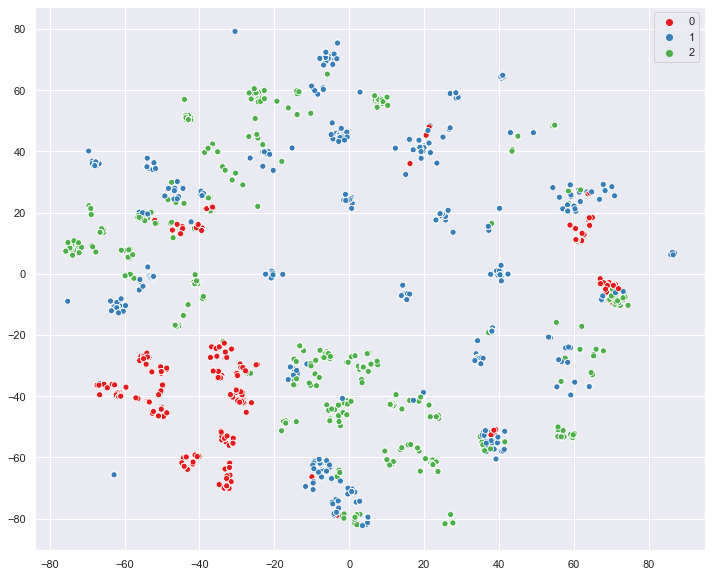

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize': (12, 10)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=model.labels_,
                palette=sns.color_palette('Set1', 3))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>,
       <AxesSubplot:title={'center':'17'}>,
       <AxesSubplot:title={'center':'18'}>,
       <AxesSubplot:title={'center':'19'}>], dtype=object)

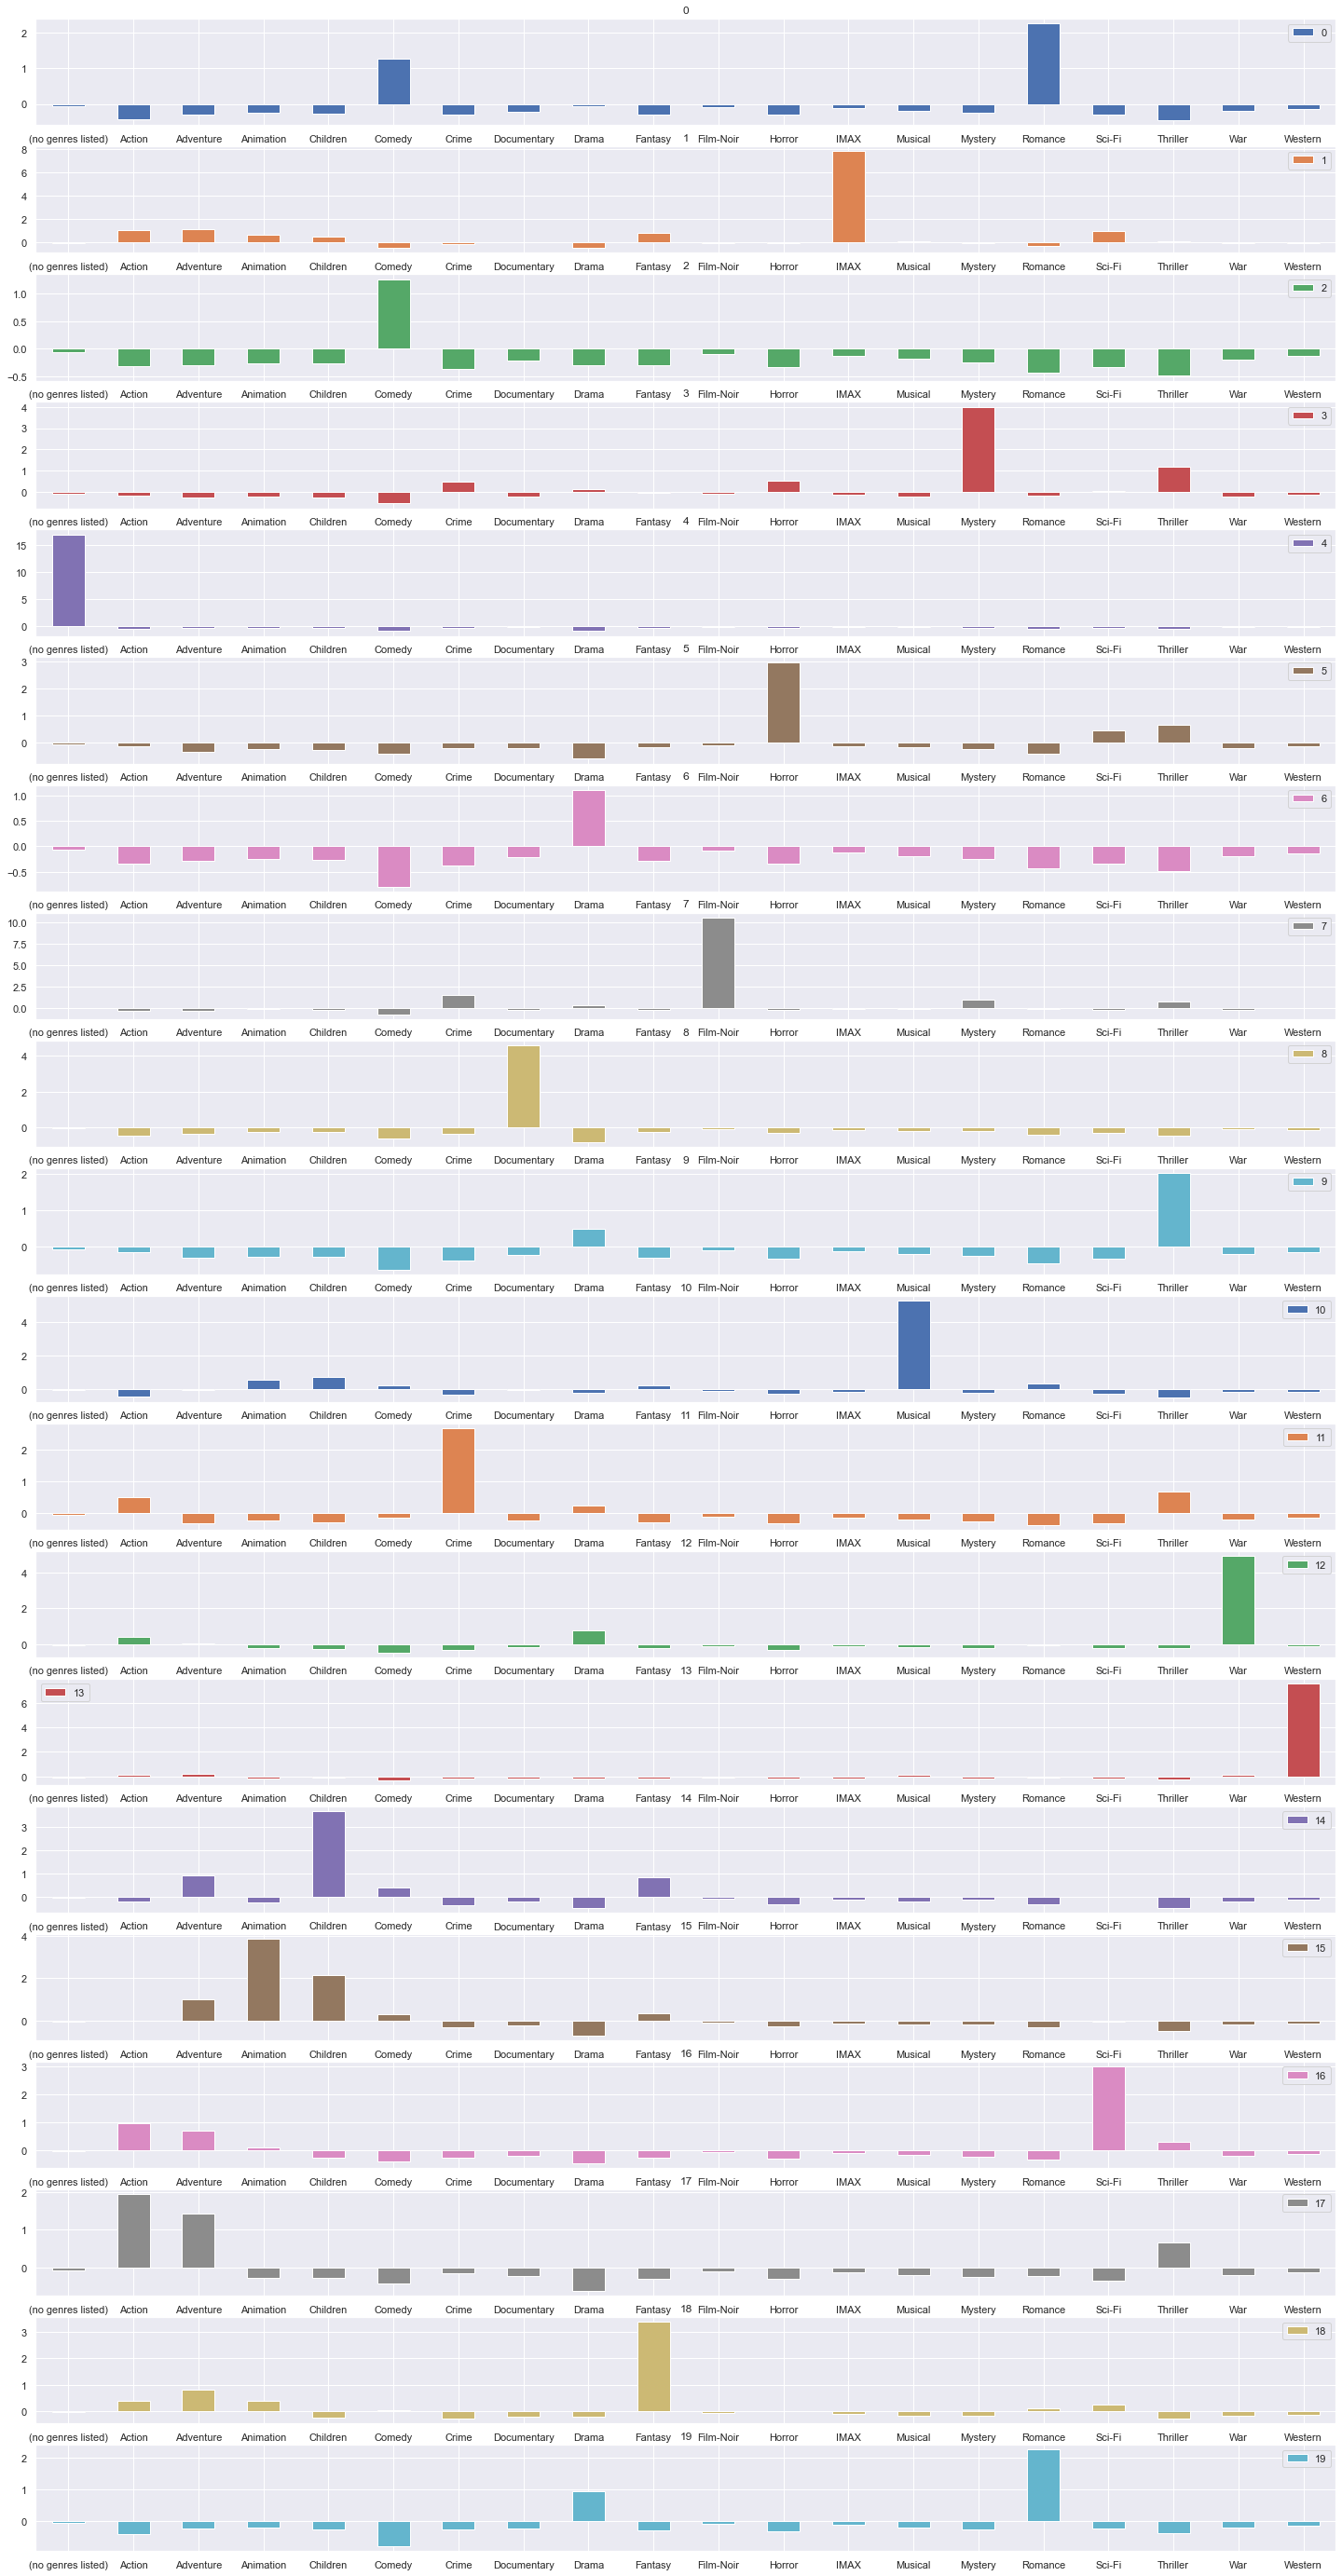

In [20]:
model = KMeans(n_clusters = 20)

model.fit(generos_escalados)

grupos = pd.DataFrame(model.cluster_centers_,
                      columns = generos.columns)
grupos.T.plot.bar(subplots = True, 
                  figsize=(25, 50), 
                  sharex=False,
                  rot=0)

In [22]:
n_grupo = 0
filtro = model.labels_ == n_grupo

filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6766,59985,Chaos Theory (2007),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8850,132660,Man Up (2015),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3342,4526,My Stepmother Is an Alien (1988),Comedy|Romance|Sci-Fi,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
7416,80549,Easy A (2010),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5109,8131,Pursuit of Happiness (2001),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1425,1948,Tom Jones (1963),Adventure|Comedy|Romance,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1614,2156,"Best Man, The (Testimone dello sposo, Il) (1998)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
476,543,So I Married an Axe Murderer (1993),Comedy|Romance|Thriller,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
6309,48342,Conversations with Other Women (2005),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4489,6638,Valley Girl (1983),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Escohendo o melhor nº de clusters (Elbow Method)

In [28]:
def inertia(n_clusters):
    m = KMeans(n_clusters)
    m.fit(generos_escalados)
    return [n_clusters, m.inertia_];
inercia = pd.DataFrame([inertia(n) for n in range(1, 41)])

<AxesSubplot:>

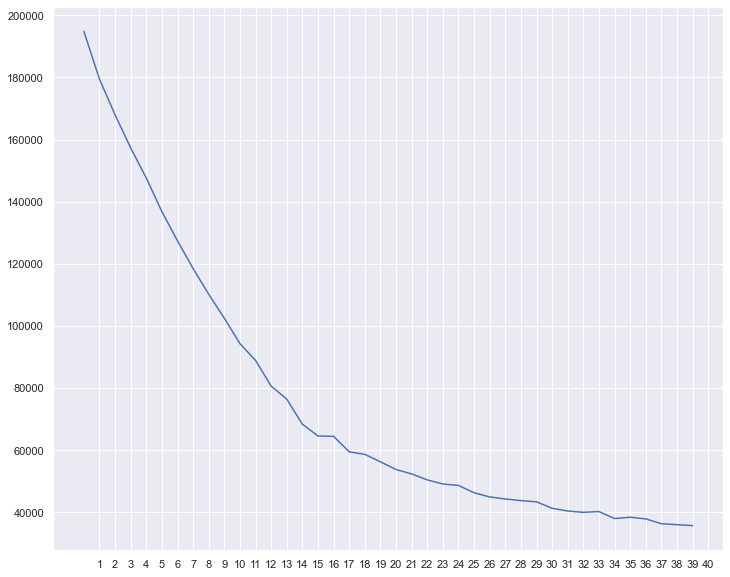

In [29]:
inercia[1].plot(xticks=inercia[0])

Como a linha de quebra ficou em n = 15, vamos fazer com 15 grupos

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>], dtype=object)

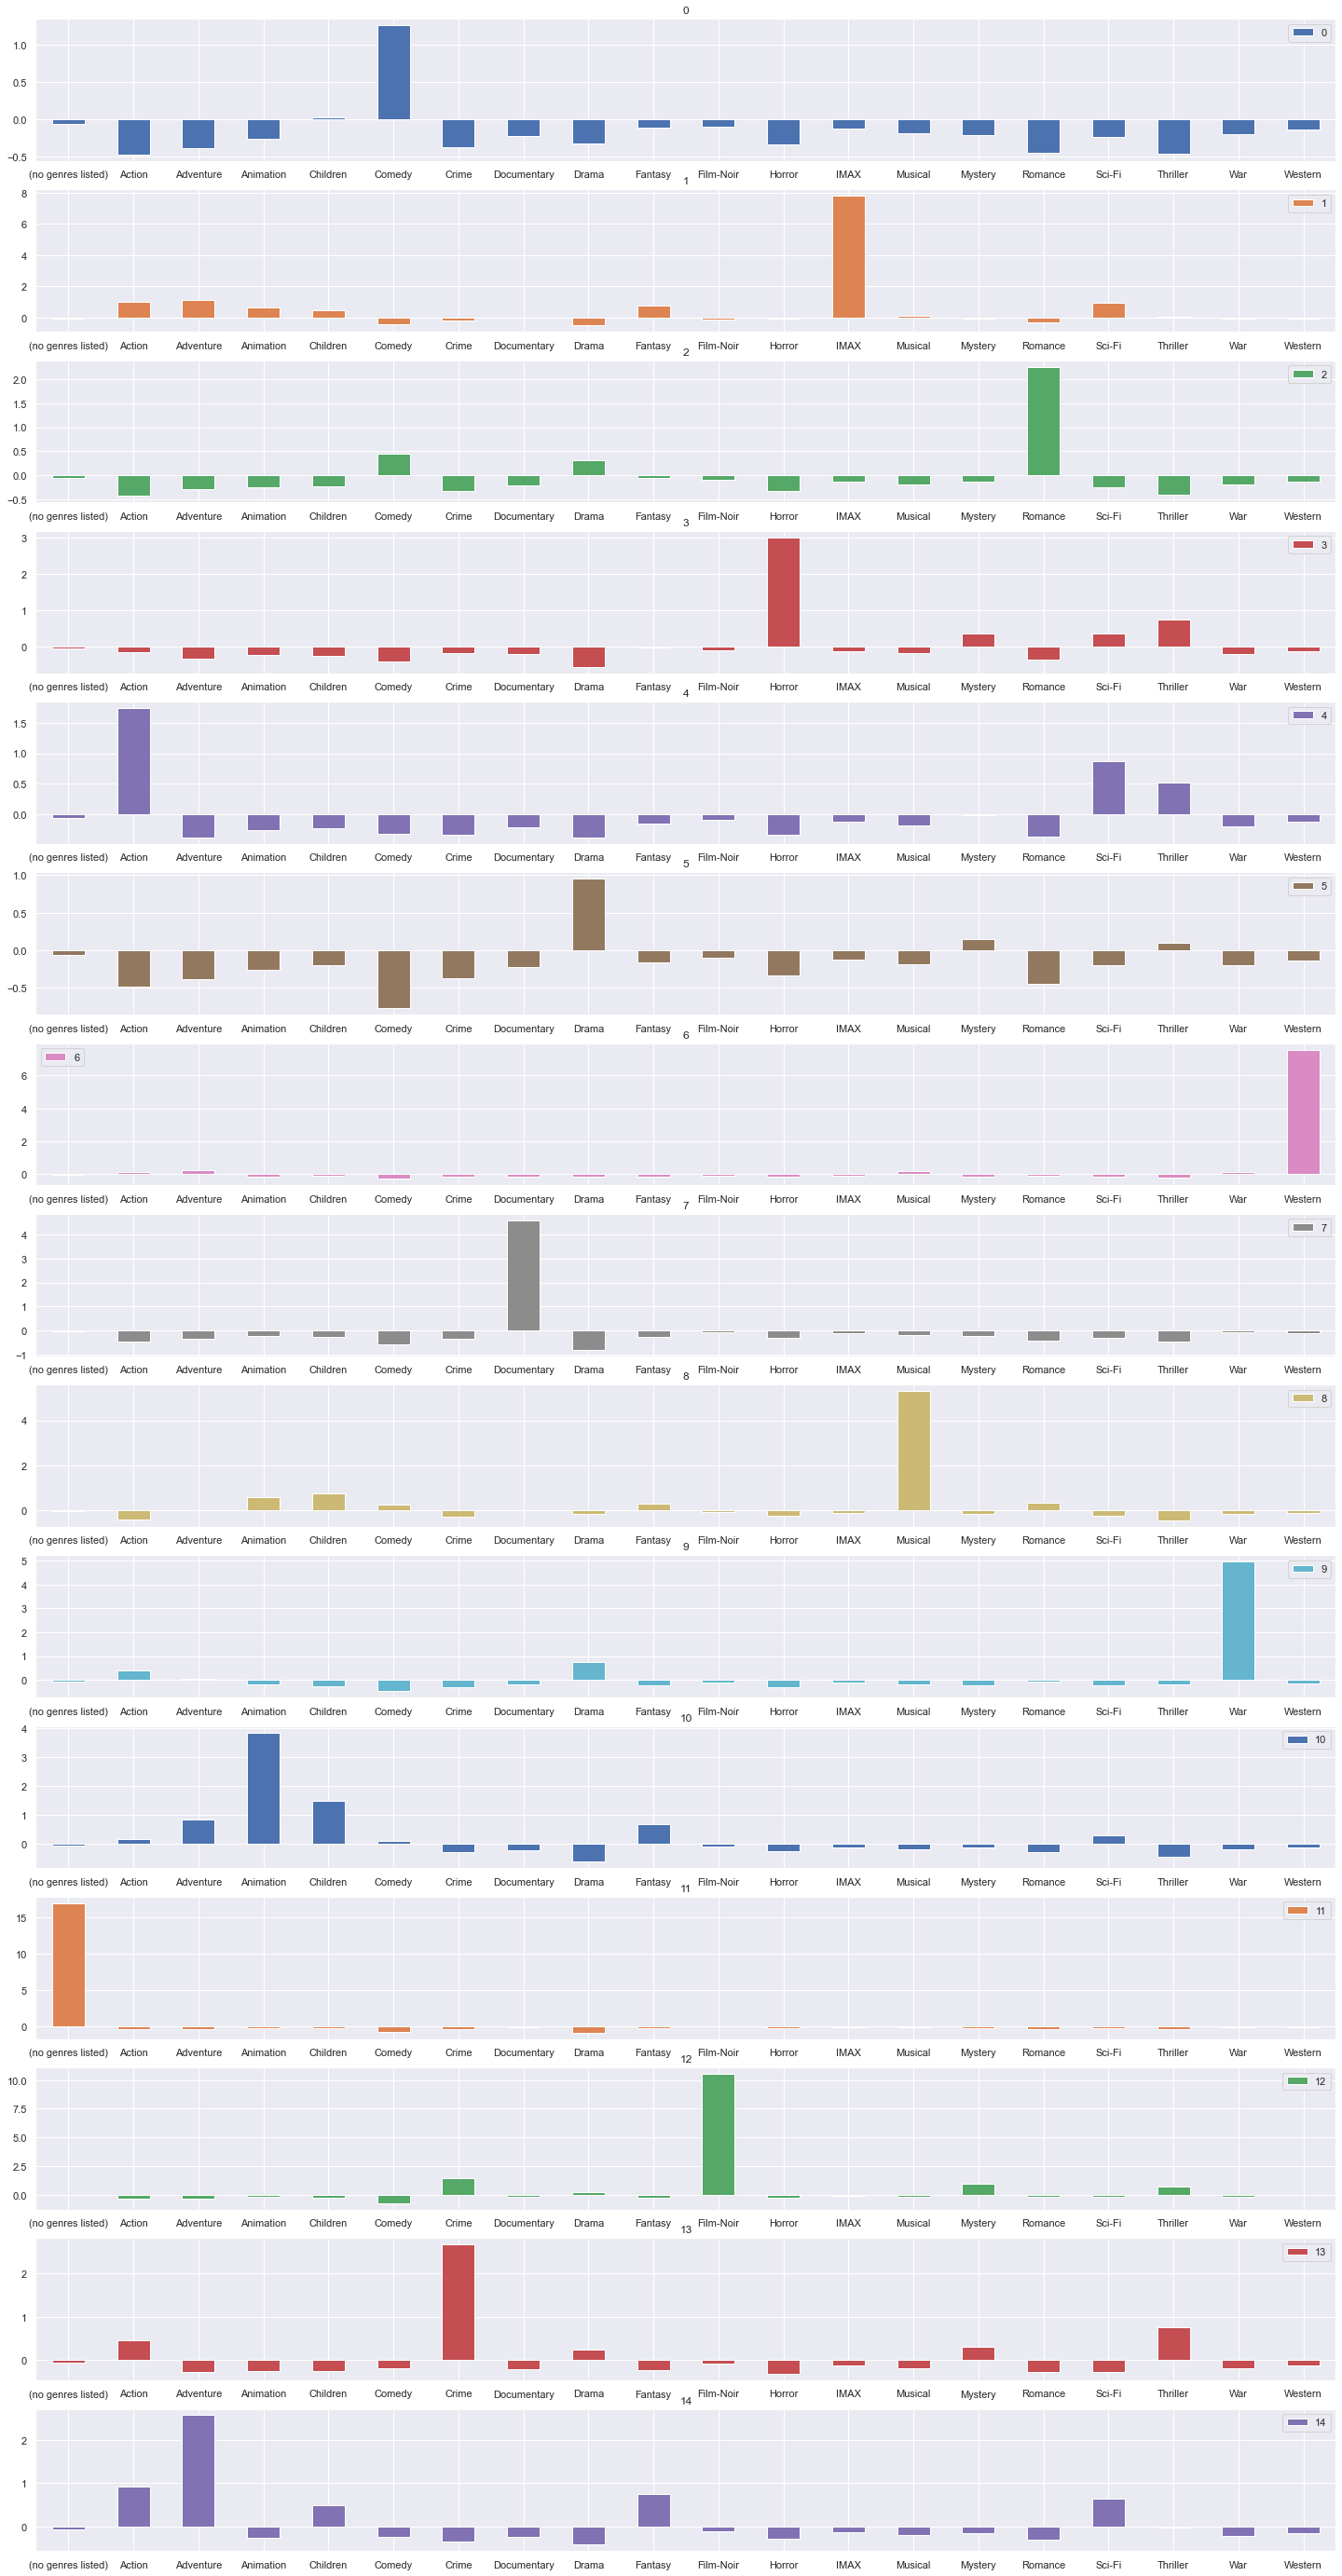

In [31]:
model = KMeans(n_clusters = 15)

model.fit(generos_escalados)

grupos = pd.DataFrame(model.cluster_centers_,
                      columns = generos.columns)
grupos.T.plot.bar(subplots = True, 
                  figsize=(25, 50), 
                  sharex=False,
                  rot=0)

In [34]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 15)
grupos = model.fit_predict(generos_escalados)
grupos

array([ 5,  0, 13, ...,  2,  5,  2], dtype=int64)

In [36]:
tnse = TSNE()
view = tsne.fit_transform(generos_escalados)
view

array([[ 63.299583 ,  29.31813  ],
       [ 75.84902  ,   1.5719433],
       [-40.928776 ,  -1.5463556],
       ...,
       [  2.1300848,  21.862223 ],
       [ 53.78752  ,  12.363841 ],
       [ -8.669901 , -15.233935 ]], dtype=float32)

<AxesSubplot:>

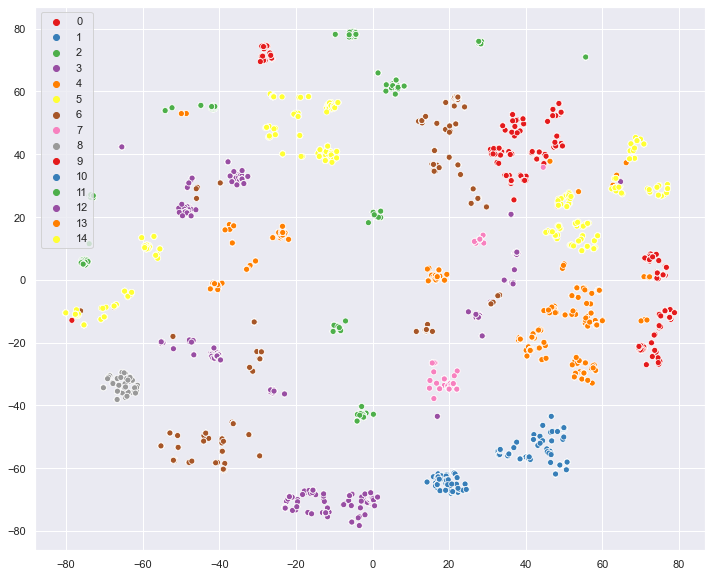

In [37]:
sns.scatterplot(x=view[:, 0],
                y=view[:, 1],
                hue=grupos,
                palette=sns.color_palette('Set1', 15))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>], dtype=object)

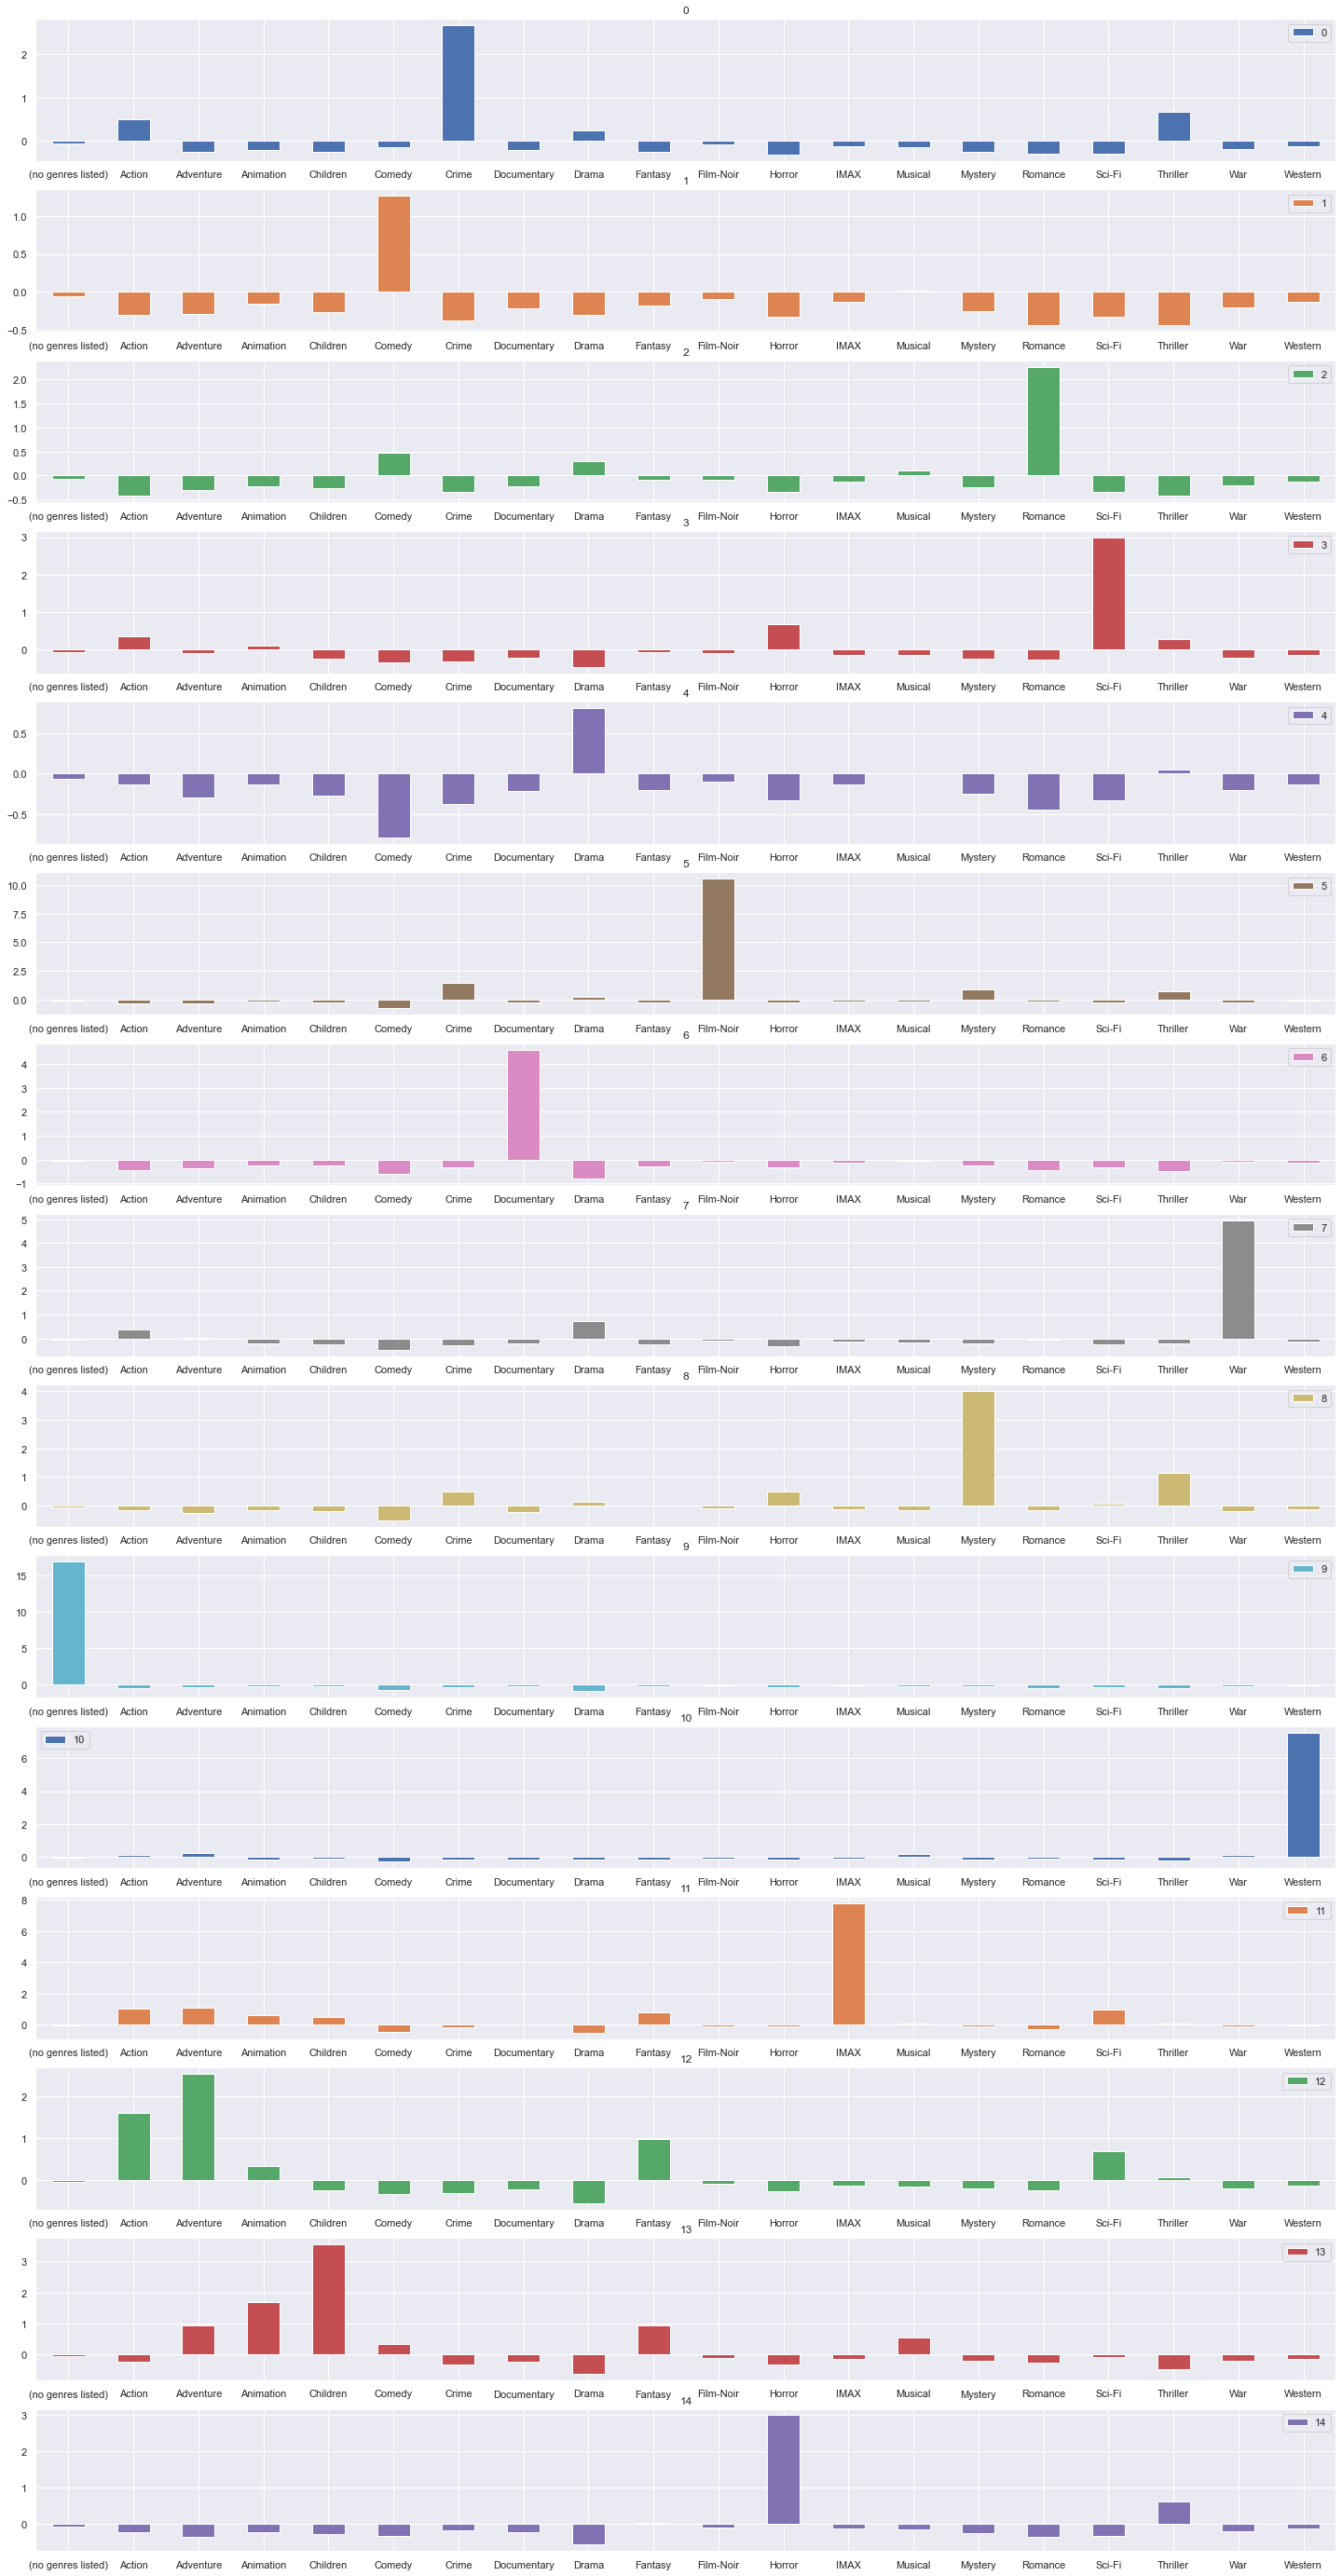

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

model = KMeans(n_clusters = 15)

model.fit(generos_escalados)

grupos = pd.DataFrame(model.cluster_centers_,
                      columns = generos.columns)
grupos.T.plot.bar(subplots = True, 
                  figsize=(25, 50), 
                  sharex=False,
                  rot=0)

In [39]:
matriz_distancia = linkage(grupos)
matriz_distancia

array([[ 1.        ,  4.        ,  2.39523129,  2.        ],
       [ 2.        , 15.        ,  2.88508045,  3.        ],
       [ 0.        , 16.        ,  3.2894113 ,  4.        ],
       [14.        , 17.        ,  3.69189703,  5.        ],
       [ 3.        , 18.        ,  3.78713078,  6.        ],
       [12.        , 19.        ,  3.97493606,  7.        ],
       [ 8.        , 20.        ,  4.63962436,  8.        ],
       [13.        , 21.        ,  4.70167842,  9.        ],
       [ 6.        , 22.        ,  5.12485724, 10.        ],
       [ 7.        , 23.        ,  5.22622045, 11.        ],
       [10.        , 24.        ,  7.83423536, 12.        ],
       [11.        , 25.        ,  8.12345259, 13.        ],
       [ 5.        , 26.        , 10.81436032, 14.        ],
       [ 9.        , 27.        , 17.0570967 , 15.        ]])

{'icoord': [[135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [95.0, 95.0, 114.375, 114.375],
  [85.0, 85.0, 104.6875, 104.6875],
  [75.0, 75.0, 94.84375, 94.84375],
  [65.0, 65.0, 84.921875, 84.921875],
  [55.0, 55.0, 74.9609375, 74.9609375],
  [45.0, 45.0, 64.98046875, 64.98046875],
  [35.0, 35.0, 54.990234375, 54.990234375],
  [25.0, 25.0, 44.9951171875, 44.9951171875],
  [15.0, 15.0, 34.99755859375, 34.99755859375],
  [5.0, 5.0, 24.998779296875, 24.998779296875]],
 'dcoord': [[0.0, 2.395231286062858, 2.395231286062858, 0.0],
  [0.0, 2.8850804533129084, 2.8850804533129084, 2.395231286062858],
  [0.0, 3.2894113022061906, 3.2894113022061906, 2.8850804533129084],
  [0.0, 3.6918970257512376, 3.6918970257512376, 3.2894113022061906],
  [0.0, 3.787130782549352, 3.787130782549352, 3.6918970257512376],
  [0.0, 3.974936057303471, 3.974936057303471, 3.787130782549352],
  [0.0, 4.639624355552589, 4.639624355552589, 

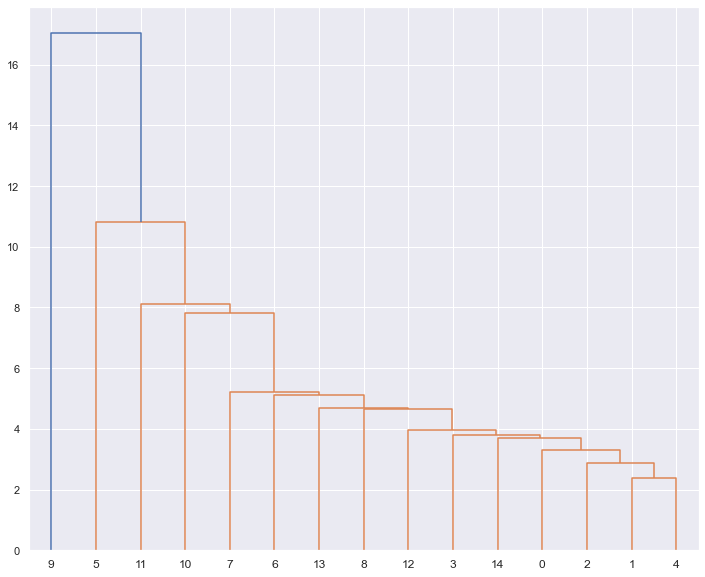

In [40]:
dendrograma = dendrogram(matriz_distancia)
dendrograma